In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from tqdm import tqdm

In [2]:
def display_multiple_img(images, titles, rows=1, cols=5):
    """Display multiple images side by side"""
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.ravel() if rows > 1 else axes
    
    for idx, (img, title) in enumerate(zip(images, titles)):
        # Convert PIL Image to numpy array if necessary
        if isinstance(img, Image.Image):
            img = np.array(img)
        
        # Ensure image is in uint8 format
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)
        
        # Convert BGR to RGB if necessary
        if len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
        axes[idx].imshow(img)
        axes[idx].set_title(title)
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
base_dir = "processed_images"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")


Original Cataract Images:


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


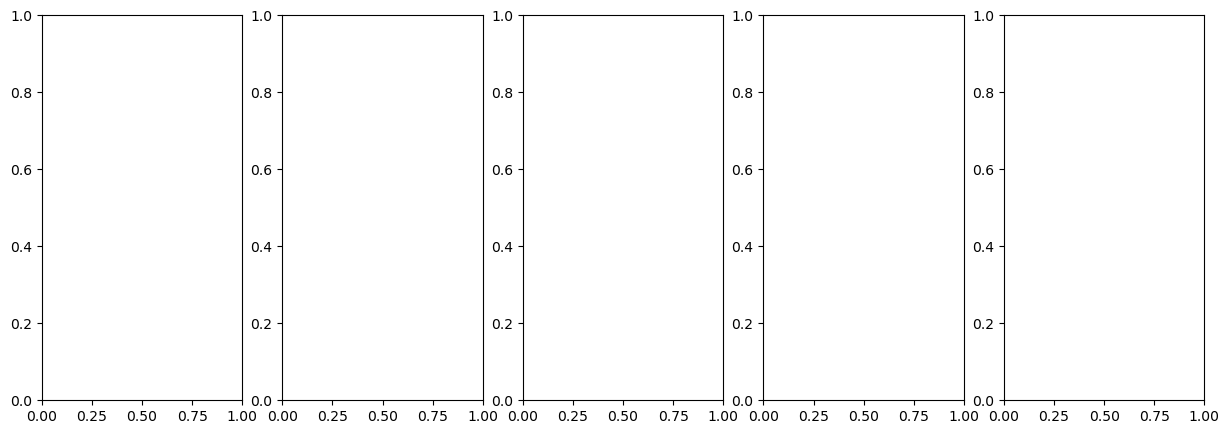

In [11]:
def load_sample_images(split="train", n_samples=5):
    cataract_dir = os.path.join(base_dir, split, "cataract")
    normal_dir = os.path.join(base_dir, split, "normal")
    
    # Load cataract samples
    cataract_files = np.random.choice(os.listdir(cataract_dir), n_samples)
    cataract_images = [cv2.imread(os.path.join(cataract_dir, f)) for f in cataract_files]
    
    # Load normal samples
    normal_files = np.random.choice(os.listdir(normal_dir), n_samples)
    normal_images = [cv2.imread(os.path.join(normal_dir, f)) for f in normal_files]
    
    return cataract_images, normal_images

# Load and display original samples
cataract_samples, normal_samples = load_sample_images("train")
print("Original Cataract Images:")
display_multiple_img(cataract_samples, [f"Sample {i+1}" for i in range(len(cataract_samples))])
print("\nOriginal Normal Images:")
display_multiple_img(normal_samples, [f"Sample {i+1}" for i in range(len(normal_samples))])


Preprocessed Cataract Images:


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


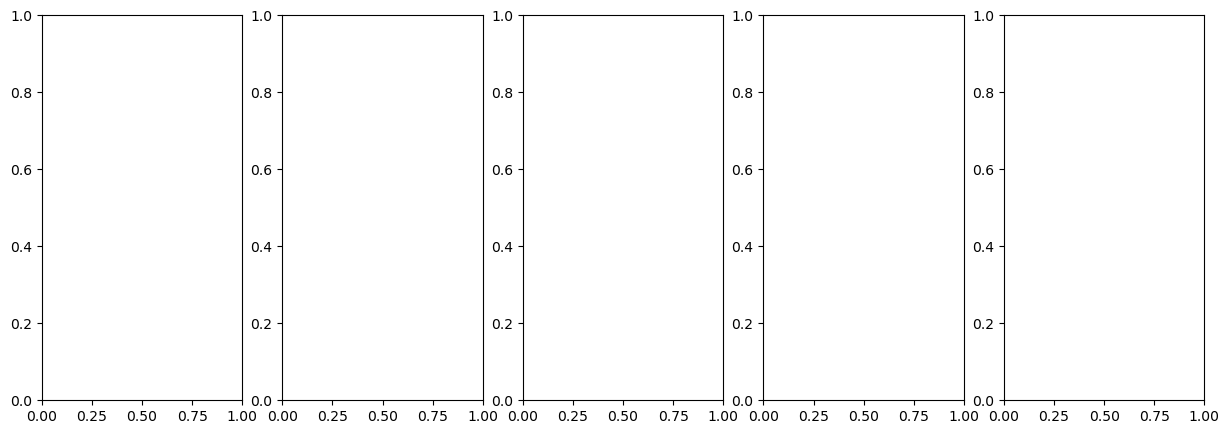

In [5]:
preprocessor = A.Compose([
    A.Resize(224, 224),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1.0),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1.0),
])

# Apply preprocessing to samples
preprocessed_cataract = [preprocessor(image=img)['image'] for img in cataract_samples]
preprocessed_normal = [preprocessor(image=img)['image'] for img in normal_samples]

print("Preprocessed Cataract Images:")
display_multiple_img(preprocessed_cataract, [f"Preprocessed {i+1}" for i in range(len(preprocessed_cataract))])
print("\nPreprocessed Normal Images:")
display_multiple_img(preprocessed_normal, [f"Preprocessed {i+1}" for i in range(len(preprocessed_normal))])


In [6]:
augmentor = A.Compose([
    A.OneOf([
        A.RandomBrightness(limit=0.2, p=0.5),
        A.RandomContrast(limit=0.2, p=0.5),
    ], p=0.7),
    A.OneOf([
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
        A.GaussianBlur(blur_limit=3, p=0.5),
    ], p=0.5),
    A.OneOf([
        A.RandomRotate90(p=0.5),
        A.Rotate(limit=10, p=0.5),
    ], p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=10, p=0.5),
    A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1, p=0.5),
])

d:\ananconda\envs\trinetra\lib\site-packages\albumentations\augmentations\transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
d:\ananconda\envs\trinetra\lib\site-packages\albumentations\augmentations\transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
d:\ananconda\envs\trinetra\lib\site-packages\albumentations\augmentations\blur\transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


In [7]:
def apply_augmentations(image, n_augmentations=5):
    """Apply multiple augmentations to a single image"""
    augmented_images = []
    for _ in range(n_augmentations):
        augmented = augmentor(image=image)['image']
        augmented_images.append(augmented)
    return augmented_images

Augmented Cataract Images:


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


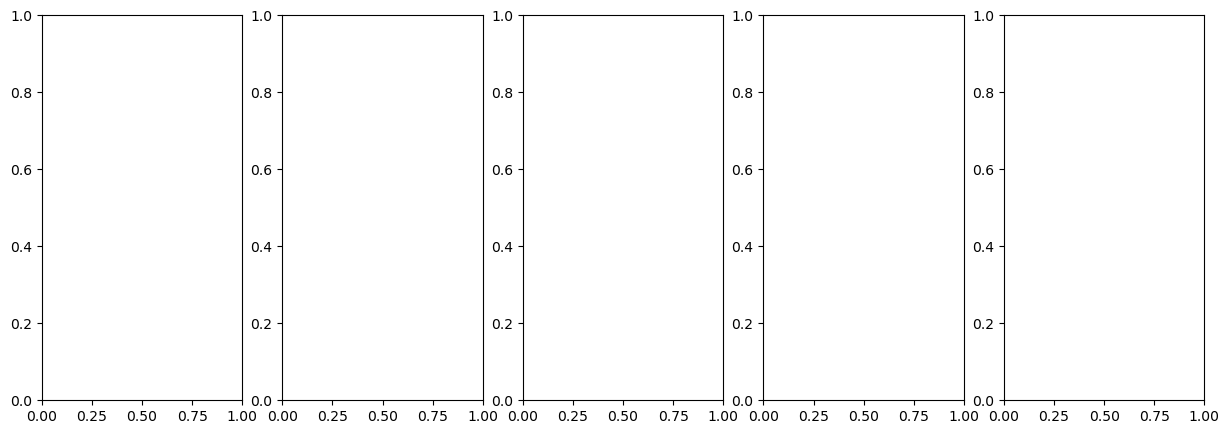

In [8]:
sample_cataract = preprocessed_cataract[0]
sample_normal = preprocessed_normal[0]

aug_cataract = apply_augmentations(sample_cataract)
aug_normal = apply_augmentations(sample_normal)

print("Augmented Cataract Images:")
display_multiple_img([sample_cataract] + aug_cataract, 
                    ["Original"] + [f"Augmentation {i+1}" for i in range(len(aug_cataract))])

print("\nAugmented Normal Images:")
display_multiple_img([sample_normal] + aug_normal, 
                    ["Original"] + [f"Augmentation {i+1}" for i in range(len(aug_normal))])


Testing CLAHE:


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


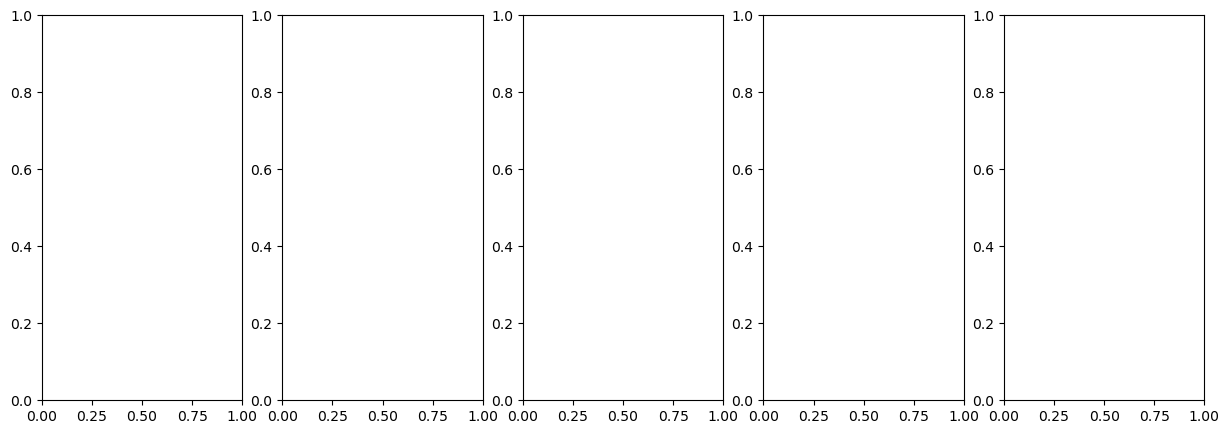

In [9]:
def test_single_augmentation(image, augmentation, n_samples=5):
    """Test a single augmentation with different parameters"""
    augmented_images = []
    titles = []
    
    for i in range(n_samples):
        transformed = augmentation(image=image)['image']
        augmented_images.append(transformed)
        titles.append(f"Sample {i+1}")
    
    print(f"Testing {augmentation.__class__.__name__}:")
    display_multiple_img([image] + augmented_images, ["Original"] + titles)

# Test individual augmentations
sample_image = preprocessed_cataract[0]

# Test CLAHE with different parameters
clahe_aug = A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1.0)
test_single_augmentation(sample_image, clahe_aug)

# Test Sharpening
sharpen_aug = A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1.0)
test_single_augmentation(sample_image, sharpen_aug)

# Test Color Jitter
color_aug = A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=1.0)
test_single_augmentation(sample_image, color_aug)


Processed Batch (Original + Augmented):


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


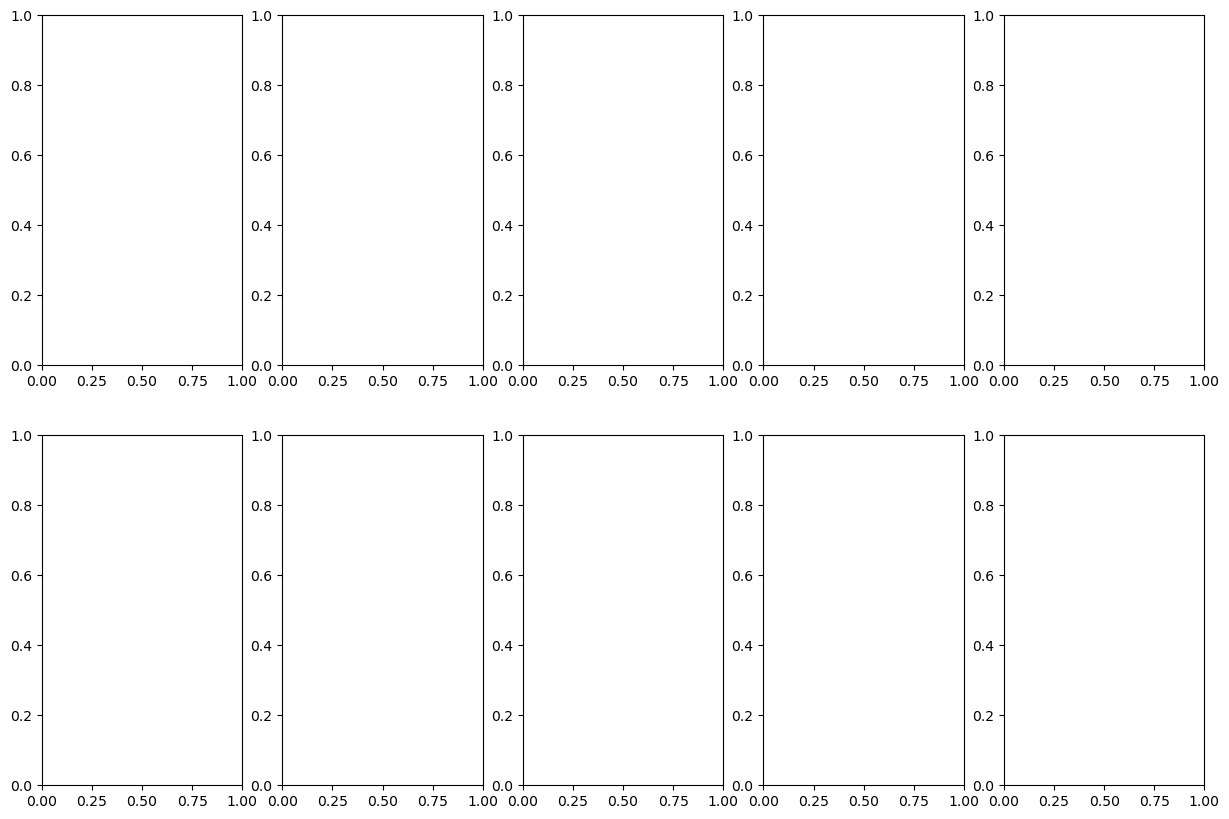

In [10]:
def process_batch(images, preprocess=True, augment=True, n_augmentations=3):
    """Process a batch of images with preprocessing and augmentation"""
    processed_images = []
    
    for img in images:
        if preprocess:
            img = preprocessor(image=img)['image']
        
        processed_images.append(img)
        
        if augment:
            augmented = apply_augmentations(img, n_augmentations)
            processed_images.extend(augmented)
    
    return processed_images

# Process a batch of images
batch_cataract = cataract_samples[:2]  # Take 2 samples
processed_batch = process_batch(batch_cataract)

print("Processed Batch (Original + Augmented):")
display_multiple_img(processed_batch, 
                    ["Original 1", "Original 2"] + [f"Aug {i+1}" for i in range(len(processed_batch)-2)],
                    rows=2)